In [2]:
from filamentlib import VField
import numpy as np
import matplotlib.pyplot as plt


# Test Notebook

## Circle Tests

At one slice of time, what is the direction of the field over a range of points

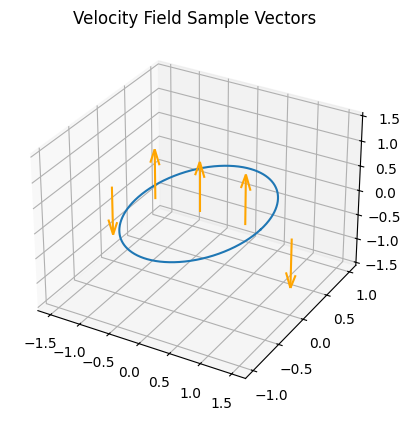

In [2]:
# Define the filament shape
circle = lambda t : [np.cos(t), np.sin(t), t * 0]
dCircle = lambda t : [-np.sin(t), np.cos(t), t * 0]
circlePoints = np.linspace(0,2*np.pi,1000)

# Calculate points on the circle to use
s = np.array(circle(circlePoints))
ds = np.array(dCircle(circlePoints))

# Find points to calculate the Velocity Field at around the circle
# In this case, it will be points along the x-axis through the circle at y=0 and z=0
domain = np.linspace(-1.5, 1.5, 5)
posFunc = lambda t: [ t, t*0, t*0 ]
pos = np.array( posFunc( domain ) )

bsPts = VField.BiotSavart( s, ds, pos )

# Create a 3D quiver plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(pos[0,:], pos[1,:], pos[2,:], bsPts[0,:], bsPts[1,:], bsPts[2,:], normalize=True, color='orange')

ax.set_zlim([-1.5,1.5])
ax.plot( s[0,:], s[1,:], s[2,:] )
plt.title('Velocity Field Sample Vectors')

plt.show()

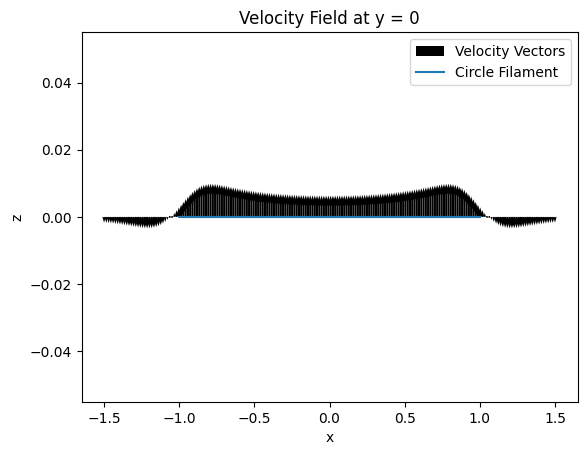

In [3]:
dom = np.linspace(-1.5,1.5,200)
posFunc = lambda t: [ t, t*0, t*0 ]
positions = np.array(posFunc( dom ))

bsPts = VField.RegularBiotSavart(s,ds,positions,10**-2)

plt.quiver( positions[0,:],positions[2,:],bsPts[0,:],bsPts[2,:] )
plt.plot( s[0,:],s[2,:] )

plt.legend(['Velocity Vectors','Circle Filament'])

plt.title('Velocity Field at y = 0')
plt.ylabel('z')
plt.xlabel('x')
plt.show()

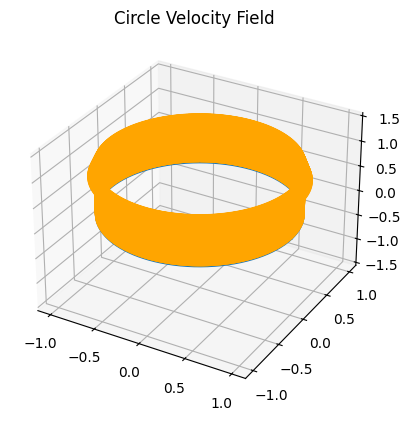

In [4]:
CircleField = VField.RegularBiotSavart(s,ds,s,10**-4)

# Create a 3D quiver plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(s[0,:], s[1,:], s[2,:], CircleField[0,:], CircleField[1,:], CircleField[2,:], normalize=True, color='orange')

ax.set_zlim([-1.5,1.5])
ax.plot( s[0,:], s[1,:], s[2,:] )
plt.title('Circle Velocity Field')

plt.show()

## Ellipse Tests

In [5]:
from filamentlib.VField import VField
import numpy as np
import matplotlib.pyplot as plt

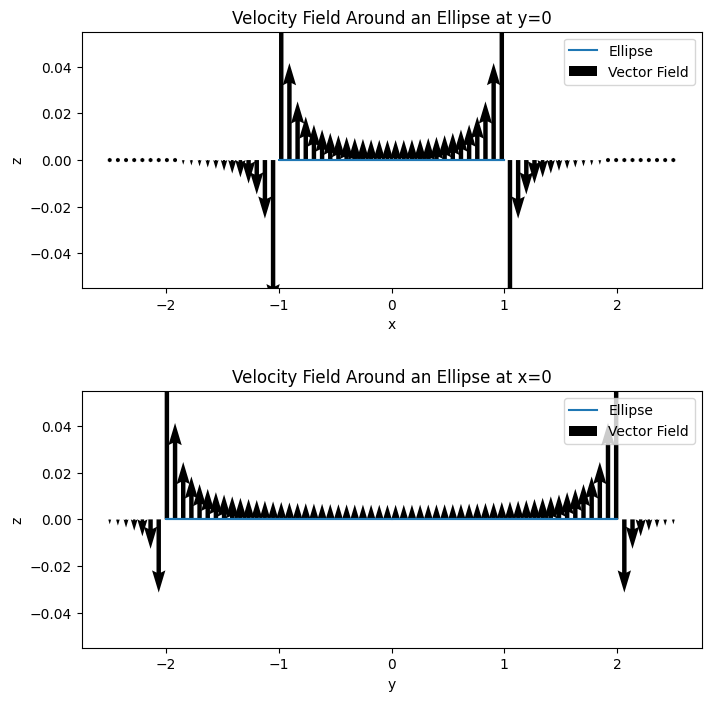

In [6]:
# Make the ellipse functions
E = lambda t: [ np.cos(t), 2 * np.sin(t), t*0 ]
dE = lambda t: [ -np.sin(t), 2 * np.cos(t), t*0 ]
EPoints = np.linspace( 0, 2 * np.pi, 200 )

# Find values on the ellipse
s = np.array( E(EPoints) )
ds = np.array( dE(EPoints) )

# Define the domain to calculate values on the x and y axis of the ellipse
dom = np.linspace(-2.5,2.5,70)

# Find values on y = 0
xPosFunc = lambda t: [ t, t*0, t*0 ]
xPositions = np.array(xPosFunc( dom ))

# Find values on x = 0
yPosFunc = lambda t: [ t*0, t, t*0 ]
yPositions = np.array(yPosFunc( dom ))

# Measure the VField at those points
bsPtsXAxis = VField.RegularBiotSavart( s, ds, xPositions, 10**-6 )
bsPtsYAxis = VField.RegularBiotSavart( s, ds, yPositions, 10**-6 )

# Get the plots ready
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# The y = 0 plot
axs[0].plot( s[0,:], s[2,:] )
axs[0].quiver( xPositions[0,:], xPositions[2,:], bsPtsXAxis[0,:], bsPtsXAxis[2,:] )
axs[0].set_title('Velocity Field Around an Ellipse at y=0')
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].legend(['Ellipse','Vector Field'])

# The x = 0 plot
axs[1].plot( s[1,:], s[2,:] )
axs[1].quiver( yPositions[1,:], yPositions[2,:], bsPtsYAxis[1,:], bsPtsYAxis[2,:] )
axs[1].set_title('Velocity Field Around an Ellipse at x=0')
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].legend(['Ellipse','Vector Field'])

# Plot Styling
plt.subplots_adjust(hspace=0.4)

# Plot the vector values
plt.show()

## Pringle Tests

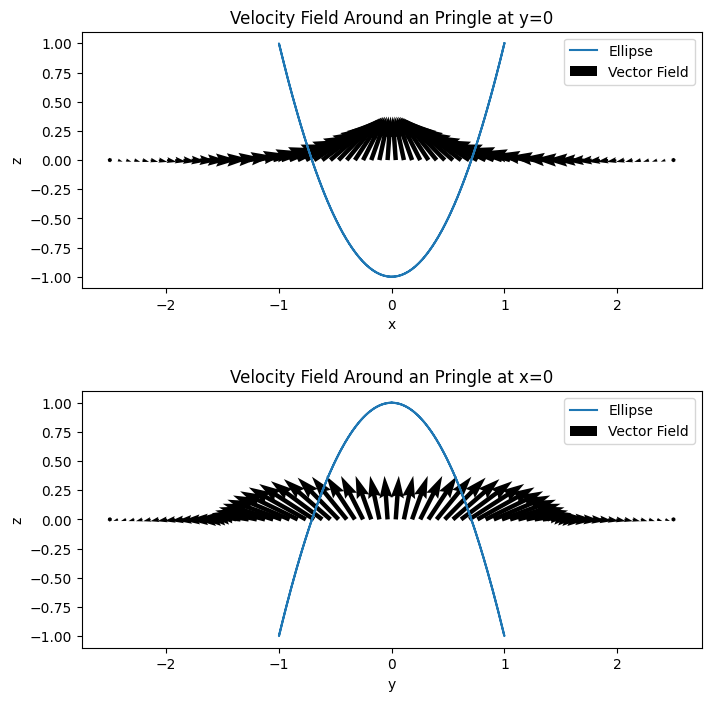

In [7]:
# Make the Pringle function
P = lambda t: [ np.cos(t), np.sin(t), np.square(np.cos(t)) - np.square(np.sin(t)) ]
dP = lambda t: [ -np.sin(t), np.cos(t), 2*np.cos(t)*(-1)*np.sin(t) - 2*np.sin(t)*np.cos(t) ]
PPoints = np.linspace( 0, 2 * np.pi, 200 )

# Find values on the pringle
s = np.array( P(PPoints) )
ds = np.array( dP(PPoints) )

# Define the domain to calculate values on the x and y axis of the pringle
dom = np.linspace(-2.5,2.5,70)

# Find values on y = 0
xPosFunc = lambda t: [ t, t*0, t*0 ]
xPositions = np.array(xPosFunc( dom ))

# Find values on x = 0
yPosFunc = lambda t: [ t*0, t, t*0 ]
yPositions = np.array(yPosFunc( dom ))

# Measure the VField at those points
bsPtsXAxis = VField.BiotSavart( s, ds, xPositions )
bsPtsYAxis = VField.BiotSavart( s, ds, yPositions )

# Get the plots ready
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# The y = 0 plot
axs[0].plot( s[0,:], s[2,:] )
axs[0].quiver( xPositions[0,:], xPositions[2,:], bsPtsXAxis[0,:], bsPtsXAxis[2,:] )
axs[0].set_title('Velocity Field Around an Pringle at y=0')
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].legend(['Ellipse','Vector Field'])

# The x = 0 plot
axs[1].plot( s[1,:], s[2,:] )
axs[1].quiver( yPositions[1,:], yPositions[2,:], bsPtsYAxis[1,:], bsPtsYAxis[2,:] )
axs[1].set_title('Velocity Field Around an Pringle at x=0')
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].legend(['Ellipse','Vector Field'])

# Plot Styling
plt.subplots_adjust(hspace=0.4)

# Plot the vector values
plt.show()

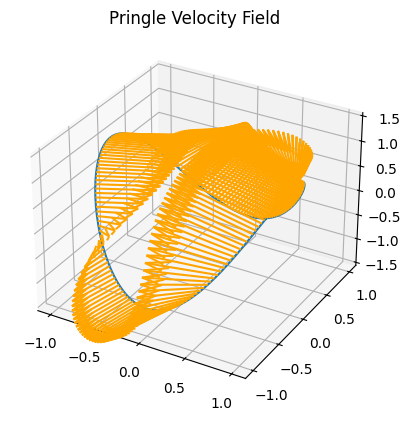

In [13]:
# Make the Pringle function
P = lambda t: [ np.cos(t), np.sin(t), np.square(np.cos(t)) - np.square(np.sin(t)) ]
dP = lambda t: [ -np.sin(t), np.cos(t), 2*np.cos(t)*(-1)*np.sin(t) - 2*np.sin(t)*np.cos(t) ]
PPoints = np.linspace( 0, 2 * np.pi, 200, endpoint=False )

# Find values on the pringle
s = np.array( P(PPoints) )
ds = np.array( dP(PPoints) )

pringleField = VField.RegularBiotSavart( s, ds, s, 10**-4 )

# Create a 3D quiver plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(s[0,:], s[1,:], s[2,:], pringleField[0,:], pringleField[1,:], pringleField[2,:], normalize=True, color='orange')

ax.set_zlim([-1.5,1.5])
ax.plot( s[0,:], s[1,:], s[2,:] )
plt.title('Pringle Velocity Field')

plt.show()

## Kappa-Binormal Field over a Pringle

In [1]:
import numpy as np
from filamentlib import VField
import matplotlib.pyplot as plt

In [2]:
t = np.linspace(-np.pi, np.pi, 100, endpoint=False)
f = lambda t: [ np.cos(t), np.sin(t), np.square(np.cos(t)) - np.square(np.sin(t)) ]
s = np.array( f(t) )

field = VField.KappaBinormal(s,t)

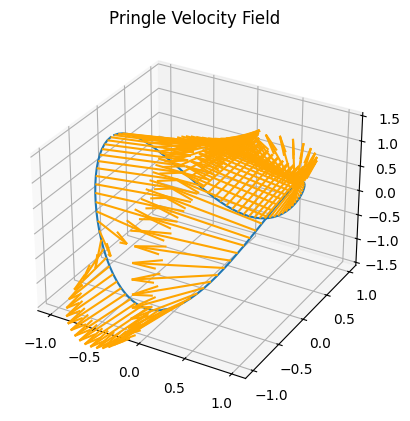

In [5]:
# Create a 3D quiver plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(s[0,:], s[1,:], s[2,:], field[0,:], field[1,:], field[2,:], normalize=True, color='orange')

ax.set_zlim([-1.5,1.5])
ax.plot( s[0,:], s[1,:], s[2,:] )
plt.title('Pringle Velocity Field')

plt.show()